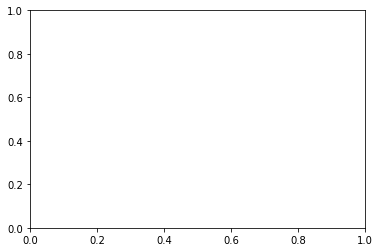

In [10]:

import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import animation

totalFrames=1000
h=1.0/totalFrames

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
line, = ax.plot([], [], lw=2)
plotlays, plotcols = [4], ["blue","blue","blue","blue"]
lines = []
for index in range(4):
    lobj = ax.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)
    
Ax=[h,]
Ay=[0,]
Bx=[1.0,]
By=[h,]
Cx=[1.0-h,]
Cy=[1.0,]
Dx=[0,]
Dy=[1.0-h,]

xList = (Ax, Bx, Cx, Dx)
yList = (Ay, By, Cy, Dy)

def init():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(i):
    for j,k in enumerate((1,2,3,0)):
        deltaX=xList[k][-1]-xList[j][-1]
        deltaY=yList[k][-1]-yList[j][-1]
        theta=math.atan2(deltaY,deltaX)
        xList[j].append(xList[j][-1]+h*math.cos(theta))
        yList[j].append(yList[j][-1]+h*math.cos(theta))
    for lnum,line in enumerate(lines):
        line.set_data(xList[lnum],yList[lnum])
    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=totalFrames, interval=20, blit=False)

anim.save('basic_animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
 
plt.show()